In [1]:
import numpy as np
import pandas as pd
!pip install -U imbalanced-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from sklearn.datasets import make_classification, make_circles
from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns
import warnings
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings(action='ignore')
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
plt.figure(figsize = (10, 5))


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [2]:
def getConfusionMatrix(model,X_test,y_test,title):
    """plot the confusion matrix of a model
    Input: model, X_test, y_test
    Output: print the confusion matrix
    """
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, predictions, labels=model.classes_)
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()
    plt.title(title)
    plt.show()

## 1.Use the provided dataset with fake tasks and legitimate tasks for this assignment

In [3]:
#read dataset from csv

dataset = pd.read_csv('MCSDatasetNEXTCONLab.csv')
dataset.head(10)

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy
0,1,45.442142,-75.303369,1,4,13,40,40,9,91,0,131380,1
1,1,45.442154,-75.304366,1,4,23,40,30,9,91,0,131380,1
2,1,45.442104,-75.303963,1,4,33,40,20,9,91,0,121996,1
3,1,45.441868,-75.303577,1,4,43,40,10,9,91,0,121996,1
4,2,45.447727,-75.147722,2,15,49,30,30,5,47,0,140784,1
5,2,45.447747,-75.147951,2,15,59,30,20,5,47,0,140784,1
6,2,45.447790,-75.148303,2,16,9,30,10,5,47,0,140784,1
7,3,45.508896,-75.259807,2,12,27,30,30,4,43,0,243994,1
8,3,45.508748,-75.260652,2,12,37,30,20,4,43,0,243994,1
9,3,45.508082,-75.260380,2,12,47,30,10,4,43,0,243994,1


In [4]:
def show_data_balanceing(title, lst_names, lst_cls ):
  plt.bar(lst_names,lst_cls,width=0.3)
  plt.title(title)
  plt.xlabel('classes')
  plt.xticks(ha='right')
  plt.ylabel('frequenncy')
  plt.show()

In [5]:
# showing the number of rows of target [0 or 1]
dataset["Ligitimacy"].value_counts()

1    12587
0     1897
Name: Ligitimacy, dtype: int64

In [6]:
dataset.shape

(14484, 13)

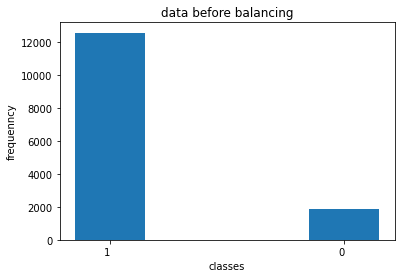

In [7]:
# visualize data balancing
lstcount = [dataset["Ligitimacy"].value_counts()[1],dataset["Ligitimacy"].value_counts()[0]]
show_data_balanceing("data before balancing",['1','0'],lstcount)

In [8]:
#split the dataset into independent variables and target
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [9]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

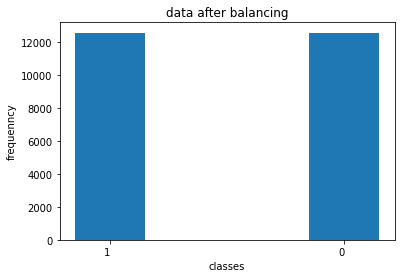

In [10]:
lstcount = [Counter(y_over)[0],Counter(y_over)[1]]
show_data_balanceing("data after balancing",['1','0'],lstcount)

In [11]:
# showing target after balance on Target [Ligitimacy]
print(Counter(y_over))

Counter({1: 12587, 0: 12587})


## 2.	Split the dataset into two for training (80%) and test (20%)

In [12]:
#split dataset into trianing and testing with 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split( X_over, y_over, test_size=0.2, random_state=42)

## 3.	Train individual MLs separately using training dataset.

[[2505    0]
 [   4 2526]]


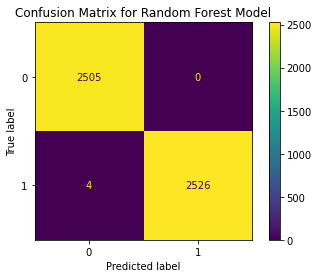


Classification Report for Random Forest Model
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      2505
 leg class 1       1.00      1.00      1.00      2530

    accuracy                           1.00      5035
   macro avg       1.00      1.00      1.00      5035
weighted avg       1.00      1.00      1.00      5035



In [13]:
#Random Forest Classifier
#We got best performance at max_depth= 23
RFclf = RandomForestClassifier(max_depth=23, random_state=0)
RFclf.fit(X_train, y_train)

# Testing accuracy of RF
ypredRF_testing =RFclf.predict(X_test)

# Training accuracy of RF is X
ypredRF_training=RFclf.predict(X_train)

#plot confusion matrix 
getConfusionMatrix(RFclf,X_test,y_test,"Confusion Matrix for {}".format("Random Forest Model"))

#Classification Report for Random Forest Model
print('\nClassification Report for Random Forest Model')
print(classification_report(y_test, ypredRF_testing,  target_names = ['class 0','leg class 1']))

In [14]:
# Training accuracy of Random Forest
X = accuracy_score(y_train , ypredRF_training)
print(f'Training accuracy of Random Forest: {X}')

Training accuracy of Random Forest: 1.0


In [15]:
# testing accuracy of Random Forest
RandomForest_test_acc = accuracy_score(y_test, ypredRF_testing)
print(f'Testing accuracy of Random Forest: {RandomForest_test_acc}')

Testing accuracy of Random Forest: 0.9992055610724926


[[2505    0]
 [   7 2523]]


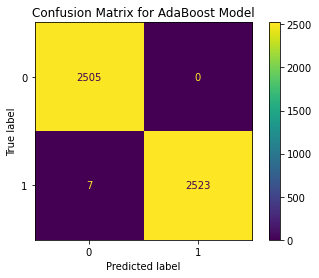


Classification Report for AdaBoost Model
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      2505
 leg class 1       1.00      1.00      1.00      2530

    accuracy                           1.00      5035
   macro avg       1.00      1.00      1.00      5035
weighted avg       1.00      1.00      1.00      5035



In [16]:
#AdaBoost Classifier
#We got best performance at n_estimators=2380
Adaclf = AdaBoostClassifier(n_estimators=2380, random_state=0)
Adaclf.fit(X_train, y_train)
#Testing accuracy of Adaboost 
ypredAda_testing=Adaclf.predict(X_test)
#Training accuracy of Adaboost is Y
ypredAda_training=Adaclf.predict(X_train)
#plot confusion matrix 
getConfusionMatrix(Adaclf,X_test,y_test,"Confusion Matrix for {}".format("AdaBoost Model"))
#Classification Report for AdaBoost Model
print('\nClassification Report for AdaBoost Model')
print(classification_report(y_test, ypredAda_testing,  target_names = ['class 0','leg class 1']))

In [17]:
# Training accuracy of Adaboost
Y = accuracy_score(y_train, ypredAda_training)
print(f'Training accuracy of Adaboost: {Y}')

Training accuracy of Adaboost: 1.0


In [18]:
# testing accuracy of Adaboost
adaBoost_test_acc = accuracy_score(y_test, ypredAda_testing)
print(f'Testing accuracy of Adaboost: {adaBoost_test_acc}')


Testing accuracy of Adaboost: 0.998609731876862


[[1198 1307]
 [ 355 2175]]


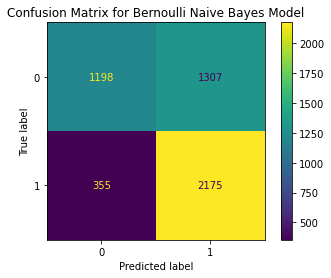


Classification Report for Bernoulli Naive Bayes Model
              precision    recall  f1-score   support

     class 0       0.77      0.48      0.59      2505
 leg class 1       0.62      0.86      0.72      2530

    accuracy                           0.67      5035
   macro avg       0.70      0.67      0.66      5035
weighted avg       0.70      0.67      0.66      5035



In [19]:
#Naive Bayes Bernoulli Classifier
#we used Bernoulli here because our problem target is 0 or 1 (binary classification)
#we also used Gaussian Naive Bayes classifier and we got the same accuracy
Bernoulliclf = BernoulliNB()
Bernoulliclf.fit(X_train, y_train)
#Training accuracy of Naïve Bayes 
ypredBernoulli_testing=Bernoulliclf.predict(X_test)
#Training accuracy of Naïve Bayes  is Z
ypredBernoulli_training=Bernoulliclf.predict(X_train)

#plot confusion matrix 
getConfusionMatrix(Bernoulliclf,X_test,y_test,"Confusion Matrix for {}".format("Bernoulli Naive Bayes Model"))
#Classification Report for Bernoulli Naive Bayes Model
print('\nClassification Report for Bernoulli Naive Bayes Model')
print(classification_report(y_test, ypredBernoulli_testing,  target_names=  ['class 0','leg class 1']))


In [20]:
# Training accuracy of Naive Bayes Bernoulli Classifier
Z = accuracy_score(y_train, ypredBernoulli_training)
print(f'Training accuracy of Naive Bayes Bernoulli Classifier: {Z}')

Training accuracy of Naive Bayes Bernoulli Classifier: 0.6759521326778887


In [21]:
# testing accuracy of Naive Bayes Bernoulli  
NaiveBayes_test_acc = accuracy_score(y_test, ypredBernoulli_testing)
print(f'Testing accuracy of Naive Bayes Bernoulli: {NaiveBayes_test_acc}')


Testing accuracy of Naive Bayes Bernoulli: 0.6699106256206554


## 5-Use the majority voting-based aggregator to make final decision for each task

In [22]:
# ypredRF_training, ypredAda, ypredBernoulli
lstvoct = []
AggOutputVotinglst = []
for i in range(0,len(ypredAda_testing)):
  sum = ypredRF_testing[i]+ ypredAda_testing [i] + ypredBernoulli_testing[i]
  if (sum <= 1):
    lstvoct.append(0)
  else:
    lstvoct.append(1)
  AggOutputVotinglst.append(sum)

In [23]:
DF_voting = pd.DataFrame()
DF_voting["Prediction of RF"] = ypredRF_testing
DF_voting["Prediction of Adaboost"] = ypredAda_testing
DF_voting["Prediction of NB"] = ypredBernoulli_testing
DF_voting["Aggregated output of voting"] = AggOutputVotinglst
DF_voting["Voting Result"] = lstvoct
display(DF_voting)

,Prediction of RF,Prediction of Adaboost,Prediction of NB,Aggregated output of voting,Voting Result
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,1,1,0
3,1,1,1,3,1
4,1,1,1,3,1
...,...,...,...,...,...
5030,0,0,1,1,0
5031,0,0,1,1,0
5032,0,0,0,0,0
5033,1,1,1,3,1


In [24]:
#Classification Report for Bernoulli Naive Bayes Model
print('\nClassification Report for Ensemble-vote')
print(classification_report(y_test, lstvoct,  target_names=  ['class 0','leg class 1']))


Classification Report for Ensemble-vote
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      2505
 leg class 1       1.00      1.00      1.00      2530

    accuracy                           1.00      5035
   macro avg       1.00      1.00      1.00      5035
weighted avg       1.00      1.00      1.00      5035



In [25]:
# Testing accuracy of VotingClassifierModel
Testing_accuracy_of_VotingClassifier= accuracy_score(y_test, lstvoct)
print(f'Testing accuracy of Ensemble-vote: {Testing_accuracy_of_VotingClassifier}')

Testing accuracy of Ensemble-vote: 0.9992055610724926


## 6. Use the weighted sum aggregation to make final decision for each task

### 1- Weighted sum of the classifier decisions

In [26]:
Total = X + Y + Z
# The Weight of random forcest (wRF = X/(X+Y+Z))
wRF = X / Total
print(f'The Weight of random forcest(wRF)       : {wRF}')
# The Weight of Adaboost (wAdaboost = Y/(X+Y+Z))
wAdaboost = Y / Total
print(f'The Weight of Adaboost(wAdaboost)       : {wAdaboost}')
# The Weight of Naive Bayes Bernoulli (wNB = Z/(X+Y+Z))
wNB = Z / Total
print(f'The Weight of Naive Bayes Bernoulli(wNB): {wNB}')

The Weight of random forcest(wRF)       : 0.37369876231652777
The Weight of Adaboost(wAdaboost)       : 0.37369876231652777
The Weight of Naive Bayes Bernoulli(wNB): 0.25260247536694436


### Aggregated output = PRF * wRF + PNB * wNB + PAdaboost * wAdaboost
𝐹𝑖𝑛𝑎𝑙 𝐷𝑒𝑐𝑖𝑠𝑖𝑜𝑛 = \
1 (𝐿𝑒𝑔𝑖𝑡𝑖𝑚𝑎𝑡𝑒)  𝐼𝑓 (𝐴𝑔𝑔𝑟𝑒𝑔𝑎𝑡𝑒𝑑𝑂𝑢𝑡𝑝𝑢𝑡 > 0.5) \
0 (𝐹𝑎𝑘𝑒/𝐼𝑙𝑙𝑒𝑔𝑖𝑡𝑖𝑚𝑎𝑡𝑒) 𝑂𝑡ℎ𝑒𝑟𝑤𝑖𝑠𝑒 EFigure 1 Ensemble

In [27]:
# ypredRF_training, ypredAda, ypredBernoulli
𝐹𝑖𝑛𝑎𝑙𝐷𝑒𝑐𝑖𝑠𝑖𝑜𝑛 = []
AggOutputlst = []
for i in range(0, len(ypredRF_testing)):
  AggOutput = ypredRF_testing[i] * wRF + ypredAda_testing[i] * wAdaboost + ypredBernoulli_testing[i] * wNB 
  AggOutputlst.append(AggOutput)
  if(AggOutput > 0.5):
    𝐹𝑖𝑛𝑎𝑙𝐷𝑒𝑐𝑖𝑠𝑖𝑜𝑛.append(1)
  else:
    𝐹𝑖𝑛𝑎𝑙𝐷𝑒𝑐𝑖𝑠𝑖𝑜𝑛.append(0)

In [28]:
DF = pd.DataFrame()
DF["Prediction of RF"] = ypredRF_testing
DF["Prediction of Adaboost"] = ypredAda_testing
DF["Prediction of NB"] = ypredBernoulli_testing
DF["Aggregated output"] = AggOutputlst
DF["𝐹𝑖𝑛𝑎𝑙 𝐷𝑒𝑐𝑖𝑠𝑖𝑜𝑛"] = 𝐹𝑖𝑛𝑎𝑙𝐷𝑒𝑐𝑖𝑠𝑖𝑜𝑛
display(DF)

,Prediction of RF,Prediction of Adaboost,Prediction of NB,Aggregated output,𝐹𝑖𝑛𝑎𝑙 𝐷𝑒𝑐𝑖𝑠𝑖𝑜𝑛
0,0,0,0,0.000000,0
1,0,0,0,0.000000,0
2,0,0,1,0.252602,0
3,1,1,1,1.000000,1
4,1,1,1,1.000000,1
...,...,...,...,...,...
5030,0,0,1,0.252602,0
5031,0,0,1,0.252602,0
5032,0,0,0,0.000000,0
5033,1,1,1,1.000000,1


In [29]:
# Testing accuracy of Ensemble-Weighted
EnsembleWeightedacc= accuracy_score(y_test, 𝐹𝑖𝑛𝑎𝑙𝐷𝑒𝑐𝑖𝑠𝑖𝑜𝑛)
print(f'Testing accuracy of Ensemble-Weighted: {EnsembleWeightedacc}')

Testing accuracy of Ensemble-Weighted: 0.9992055610724926


In [30]:
#Classification Report for Ensemble-Weighted
print('\nClassification Report for Ensemble-Weighted')
print(classification_report(y_test, 𝐹𝑖𝑛𝑎𝑙𝐷𝑒𝑐𝑖𝑠𝑖𝑜𝑛,  target_names=  ['class 0','leg class 1']))


Classification Report for Ensemble-Weighted
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      2505
 leg class 1       1.00      1.00      1.00      2530

    accuracy                           1.00      5035
   macro avg       1.00      1.00      1.00      5035
weighted avg       1.00      1.00      1.00      5035



##7 .Compare the two ensemble framework performance to each other, and with individual MLs

In [31]:
def DrawBarChar(Algors_names, Algors_Accrs):
  plt.bar(Algors_names, Algors_Accrs,width=.6)
  plt.title('Accuracy comparison results ')
  plt.xlabel('Models')
  plt.xticks(rotation=60, ha='right')
  plt.ylabel('Accuracy')
  plt.show()

In [32]:
Algors = ["Ensemble-vote", "Ensemble-Weighted", "Random Forcest Classifier", "AdaBoost Classifier", "Naive Bayes Bernoulli Classifier"]
Accrs = [Testing_accuracy_of_VotingClassifier, EnsembleWeightedacc, RandomForest_test_acc,adaBoost_test_acc,NaiveBayes_test_acc]


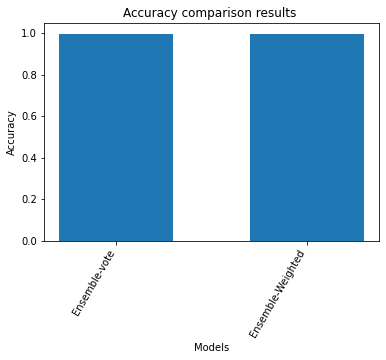

In [33]:
#Compare the two ensemble framework performance
DrawBarChar(Algors[:2] ,Accrs[:2])

In [34]:
lstTestingaccuracyEm = [Testing_accuracy_of_VotingClassifier, EnsembleWeightedacc]

dfTwoEnsemble = pd.DataFrame(index=["Ensemble-vote","Ensemble-Weighted"])

dfTwoEnsemble["Testing accuracy"] = lstTestingaccuracyEm

display(dfTwoEnsemble)

,Testing accuracy
Ensemble-vote,0.999206
Ensemble-Weighted,0.999206


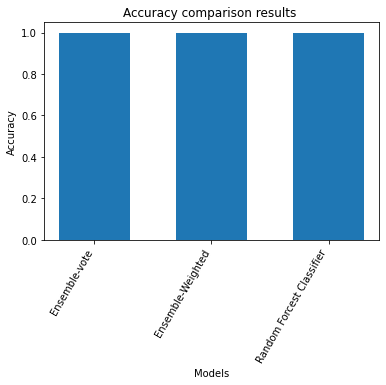

In [35]:
#Compare the two ensemble framework performance with Random Forcest Classifier
DrawBarChar(Algors[:3] ,Accrs[:3])

In [36]:

lstTestingaccuracyRF = [Testing_accuracy_of_VotingClassifier, EnsembleWeightedacc, RandomForest_test_acc]

dfTwoEnsembleWithRF = pd.DataFrame(index=["Ensemble-vote","Ensemble-Weighted","Random Forcest Classifier"])
dfTwoEnsembleWithRF["Testing accuracy"] = lstTestingaccuracyRF

display(dfTwoEnsembleWithRF)

,Testing accuracy
Ensemble-vote,0.999206
Ensemble-Weighted,0.999206
Random Forcest Classifier,0.999206


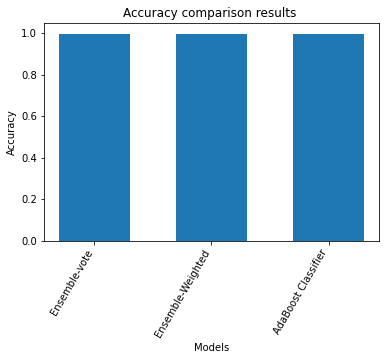

In [37]:
#Compare the two ensemble framework performance with AdaBoost Classifier
lstlabels = ["Ensemble-vote", "Ensemble-Weighted", "AdaBoost Classifier"]
lstAcrrs = [Testing_accuracy_of_VotingClassifier, EnsembleWeightedacc, adaBoost_test_acc]
DrawBarChar(lstlabels,lstAcrrs)

In [43]:
lstTestingaccuracyAda = [Testing_accuracy_of_VotingClassifier, EnsembleWeightedacc, adaBoost_test_acc]
dfTwoEnsembleWithAda = pd.DataFrame(index=["Ensemble-vote","Ensemble-Weighted","AdaBoost Classifier"])
dfTwoEnsembleWithAda["Testing accuracy"] = lstTestingaccuracyAda
display(dfTwoEnsembleWithAda)


,Testing accuracy
Ensemble-vote,0.999206
Ensemble-Weighted,0.999206
AdaBoost Classifier,0.998610


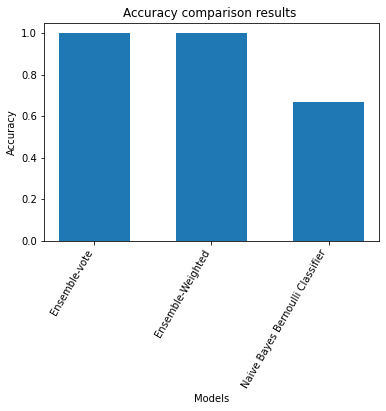

In [39]:
#Compare the two ensemble framework performance with Naive Bayes Bernoulli Classifier
lstlabels = ["Ensemble-vote", "Ensemble-Weighted", "Naive Bayes Bernoulli Classifier"]
lstAcrrs = [Testing_accuracy_of_VotingClassifier, EnsembleWeightedacc, NaiveBayes_test_acc]
DrawBarChar(lstlabels,lstAcrrs)

In [40]:

lstTestingaccuracyNB = [Testing_accuracy_of_VotingClassifier, EnsembleWeightedacc, NaiveBayes_test_acc]

dfTwoEnsembleWithAda = pd.DataFrame(index=["Ensemble-vote","Ensemble-Weighted","Naive Bayes Bernoulli Classifier"])
dfTwoEnsembleWithAda["Testing accuracy"] = lstTestingaccuracyNB
display(dfTwoEnsembleWithAda)

,Testing accuracy
Ensemble-vote,0.999206
Ensemble-Weighted,0.999206
Naive Bayes Bernoulli Classifier,0.669911


## 8. Plot a barchart figure to show accuracy comparison results

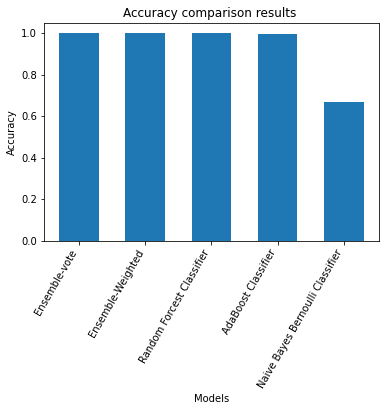

In [41]:
#Compare the two ensemble framework performance with Three Algors ML
DrawBarChar(Algors,Accrs)

In [42]:
dfTwoEnsembleWiththree = pd.DataFrame(index= Algors)
dfTwoEnsembleWiththree["Testing accuracy"] = Accrs
display(dfTwoEnsembleWiththree)

,Testing accuracy
Ensemble-vote,0.999206
Ensemble-Weighted,0.999206
Random Forcest Classifier,0.999206
AdaBoost Classifier,0.998610
Naive Bayes Bernoulli Classifier,0.669911
